# Predictive Analysis in Cardiovascular Medicine



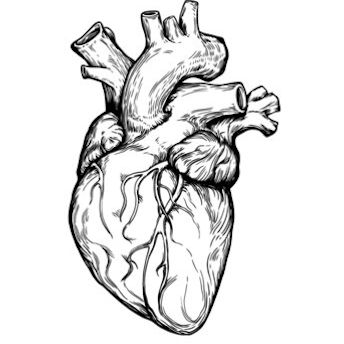

Heart failure is a critical medical condition with a significant impact on patients' lives. This assignment explores predictive analytics in cardiovascular medicine using a dataset containing medical profiles of 299 patients who experienced heart failure. Clustering, regression, and classification will be used to predict the 'DEATH_EVENT.


Applied Clustering, Regression, and Classification

---

*Matthew Acs*

## Data

The dataset includes the medical profiles of 299 heart failure patients, with 13 clinical features, including age, sex, anemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, smoking, and time, with the outcome variable 'DEATH_EVENT’.

In [ ]:
# import general libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from copy import deepcopy
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

---

The code cell below loads the data into a pandas data frame and previews the first five datapoints.

---

In [ ]:
url = "https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


---

The code cell below shows the statistics of the dataset including the mean, minimum, and maximum.

---

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The dataset clearly contains 299 samples with 12 clinical attributes and one target attribute (death). For binary attributes, the mean shows the percentage of samples that belong to one class (for instance 41.8% of the patients in the dataset have diabetes).

---

The code cell below converts the pandas data frame into numpy arrays for the data and targets in X and Y respectively.

---

In [ ]:
X = (df.drop(columns = 'DEATH_EVENT')).to_numpy()
Y = (df.loc[:,'DEATH_EVENT']).to_numpy()

---


The code cell below prints X and the shape of X to confirm that it contains 299 data points and 12 attributes.


---

In [ ]:
print(np.shape(X))
print()
print(X)

(299, 12)

[[7.500e+01 0.000e+00 5.820e+02 ... 1.000e+00 0.000e+00 4.000e+00]
 [5.500e+01 0.000e+00 7.861e+03 ... 1.000e+00 0.000e+00 6.000e+00]
 [6.500e+01 0.000e+00 1.460e+02 ... 1.000e+00 1.000e+00 7.000e+00]
 ...
 [4.500e+01 0.000e+00 2.060e+03 ... 0.000e+00 0.000e+00 2.780e+02]
 [4.500e+01 0.000e+00 2.413e+03 ... 1.000e+00 1.000e+00 2.800e+02]
 [5.000e+01 0.000e+00 1.960e+02 ... 1.000e+00 1.000e+00 2.850e+02]]


---

The code cell below prints Y and the shape of Y to confirm that it contains 299 data points and 1 attribute (the label).

---

In [ ]:
print(np.shape(Y))
print()
print(Y)

(299,)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


---

The code cell below standardizes the data and applies principal component analysis to it. The first three/two components are shown in the graphs below to visualize the data.

---

In [ ]:
scaler = StandardScaler()
X_original = deepcopy(X)
X = scaler.fit_transform(X)

In [ ]:
pca_3D = PCA(n_components=3)
X_pca_3D = pca_3D.fit_transform(X)

fig = px.scatter_3d(
      X_pca_3D, x=0, y=1, z=2, color=Y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

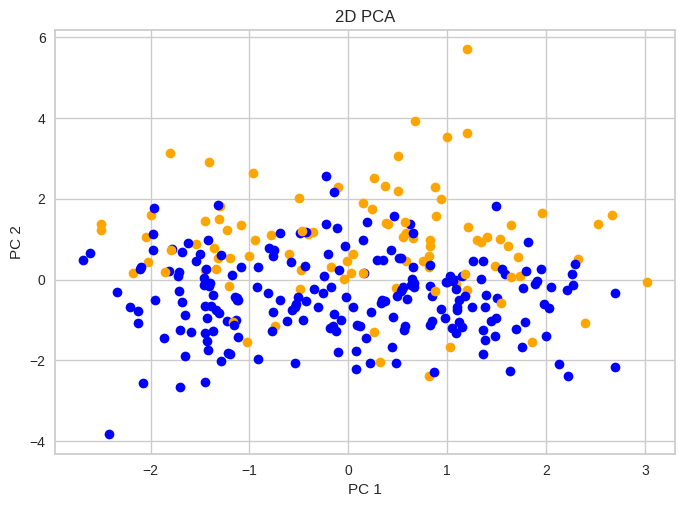

In [ ]:
pca_2D = PCA(n_components=2)
X_pca_2D = pca_2D.fit_transform(X)

for i in range(len(Y)):
  if Y[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  else:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'orange')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D PCA')
plt.show()

The PCA shows that the two classes (death event occurs, and no death event occurs) occupy semi-separate regions after the data is projected onto the top three/two principal components. This implies that the data is likely separable (to a degree) into the two defined classes. The PCA also shows the general distribution of the data with respect to each class label after PCA.

Now that the data is loaded and a basic EDA has been completed, the clustering, regression, and classification analysis can be done.

## Clustering Analysis

---

### Apply K-Means clustering to the dataset using all features except 'DEATH_EVENT.'



---

The code below uses k-means clustering on the dataset to create two dataset clusters. All features were used; however, these clusters are difficult to visualize due to the 12-dimensional features space that they exist in. Therefore, once the centroids are computed, I used the 2D PCA that I fit earlier to transform the centroids into the PCA space. I then plotted the 2D-PCA from earlier along with the 12-dimensional centroids projected onto the PCA space. The datapoints in the PCA space were also colored according to the cluster they belong to, which was calculated using the original 12-dimensinal centroids. Essentially, the clustering operation took place in the original 12-dimensinal space, and I used PCA to visualize the result.

---

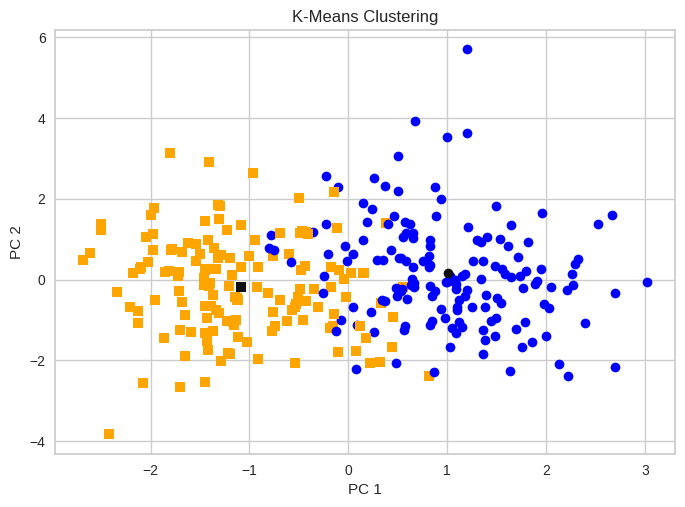

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
cluster_centers = pca_2D.transform(kmeans.cluster_centers_)

for i in range(len(Y)):
  if kmeans.labels_[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif kmeans.labels_[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')

plt.plot(cluster_centers[0][0], cluster_centers[0][1], 'o', color = 'k')
plt.plot(cluster_centers[1][0], cluster_centers[1][1], 's', color = 'k')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering')
plt.show()

Clearly, while our dataset has two labels (death occurs or no death occurs) using K means clustering does not identify clear clusters in the data that match the class labels. This can be seen by comparing the 2D PCA from earlier with the k means clustering (k=2) visualized using 2D PCA.

### Determine the optimal number of clusters and visualize the clusters.



---

The code below uses the yellowbrick python library to create a K means clustering elbow graph. This graph can be used to estimate the optimal number of clusters for K means clustering.

---

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

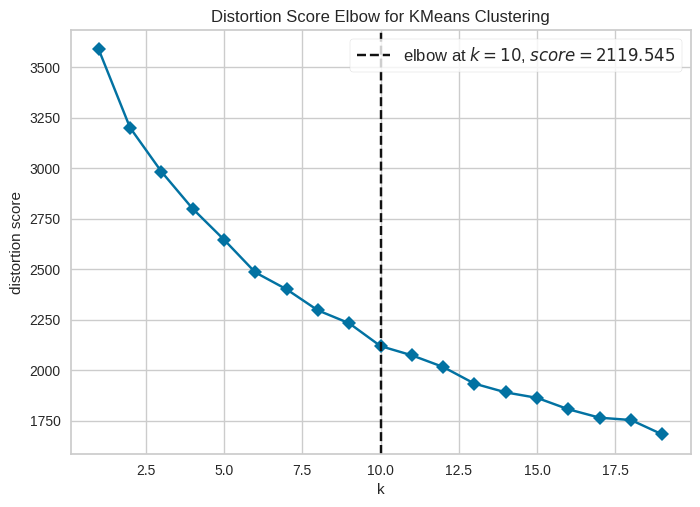

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,20), timings= False)
visualizer.fit(X)
visualizer.show()

The graph shows that an “elbow” occurs at k=10 when plotting distortion scores as a function of the number of clusters. This means that 10 clusters is likely a near optimal number of clusters for the dataset using k means clustering. The elbow method is commonly used to determine the optimal number of clusters for K means clustering.

---

The code below repeats the k means clustering and PCA-based visualization executed above for 10 clusters.

---

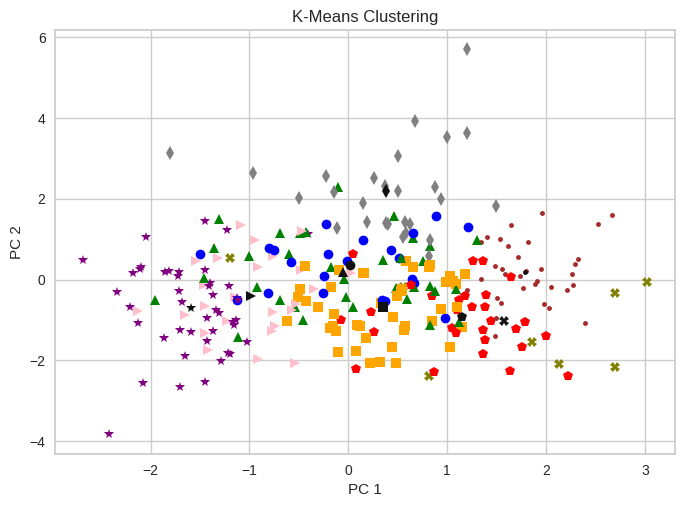

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X)
cluster_centers = pca_2D.transform(kmeans.cluster_centers_)

for i in range(len(Y)):
  if kmeans.labels_[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif kmeans.labels_[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')
  elif kmeans.labels_[i] == 2:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '^', color = 'green')
  elif kmeans.labels_[i] == 3:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'p', color = 'red')
  elif kmeans.labels_[i] == 4:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '*', color = 'purple')
  elif kmeans.labels_[i] == 5:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '.', color = 'brown')
  elif kmeans.labels_[i] == 6:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '>', color = 'pink')
  elif kmeans.labels_[i] == 7:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'd', color = 'gray')
  elif kmeans.labels_[i] == 8:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'X', color = 'olive')
  elif kmeans.labels_[i] == 9:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '|', color = 'cyan')

plt.plot(cluster_centers[0][0], cluster_centers[0][1], 'o', color = 'k')
plt.plot(cluster_centers[1][0], cluster_centers[1][1], 's', color = 'k')
plt.plot(cluster_centers[2][0], cluster_centers[2][1], '^', color = 'k')
plt.plot(cluster_centers[3][0], cluster_centers[3][1], 'p', color = 'k')
plt.plot(cluster_centers[4][0], cluster_centers[4][1], '*', color = 'k')
plt.plot(cluster_centers[5][0], cluster_centers[5][1], '.', color = 'k')
plt.plot(cluster_centers[6][0], cluster_centers[6][1], '>', color = 'k')
plt.plot(cluster_centers[7][0], cluster_centers[7][1], 'd', color = 'k')
plt.plot(cluster_centers[8][0], cluster_centers[8][1], 'X', color = 'k')
plt.plot(cluster_centers[9][0], cluster_centers[9][1], '|', color = 'k')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('K-Means Clustering')
plt.show()

The resulting clusters do not better approximate the classes based on the data labels. However, they suggest that the dataset may be composed of subsets that contain distinct features (i.e. patients who had heart failure due to diabetic complications).

### Implement Kernel K-Means clustering with the same features and visualize the results.



---

Sklearn does not have a kernel k means implementation. However, a core developer of the Sklearn library who now works at Google DeepMind released an implementation of Kernel_K_Means that was to be included in Sklearn. This implementation is available on his GitHub. I used this implementation to implement kernel k means clustering. Additionally, I used the rbf kernel.

---

In [ ]:
!wget https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/Kernel_K_Means.py
import Kernel_K_Means

--2023-10-31 19:29:38--  https://raw.githubusercontent.com/matthewaaa123/CAP6673/main/Kernel_K_Means.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3776 (3.7K) [text/plain]
Saving to: ‘Kernel_K_Means.py’

Kernel_K_Means.py   100%[===================>]   3.69K  --.-KB/s    in 0s      

2023-10-31 19:29:38 (64.5 MB/s) - ‘Kernel_K_Means.py’ saved [3776/3776]



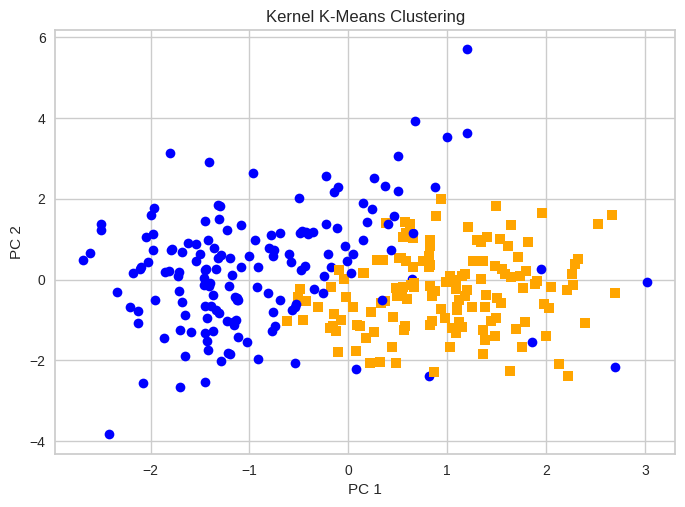

In [ ]:
kernel = Kernel_K_Means.KernelKMeans
KKM = kernel(n_clusters=2, kernel='rbf').fit(X)
KKM_labels = KKM.predict(X)

for i in range(len(Y)):
  if KKM_labels[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif KKM_labels[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Kernel K-Means Clustering')
plt.show()

The clustering result does not better match the classes for k=2.

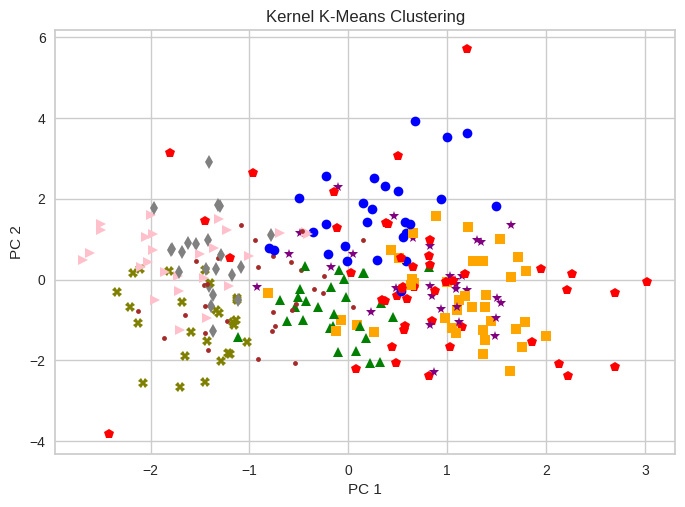

In [ ]:
kernel = Kernel_K_Means.KernelKMeans
KKM = kernel(n_clusters=10, kernel='rbf').fit(X)
KKM_labels = KKM.predict(X)

for i in range(len(Y)):
  if KKM_labels[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif KKM_labels[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')
  elif KKM_labels[i] == 2:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '^', color = 'green')
  elif KKM_labels[i] == 3:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'p', color = 'red')
  elif KKM_labels[i] == 4:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '*', color = 'purple')
  elif KKM_labels[i] == 5:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '.', color = 'brown')
  elif KKM_labels[i] == 6:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '>', color = 'pink')
  elif KKM_labels[i] == 7:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'd', color = 'gray')
  elif KKM_labels[i] == 8:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'X', color = 'olive')
  elif KKM_labels[i] == 9:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '|', color = 'cyan')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Kernel K-Means Clustering')
plt.show()

The k=10 clustering result with the rbf kernel shows different clusters from the regular k means clustering algorithm. The clusters identified here  display patterns that are more radial in nature (i.e. one cluster contains elements that have a large radius from the center of the grid).

### Apply Expectation Maximization (EM) clustering.



---

Finally, the code below applies expectation maximization clustering to the dataset. The same procedure is used as above.

---

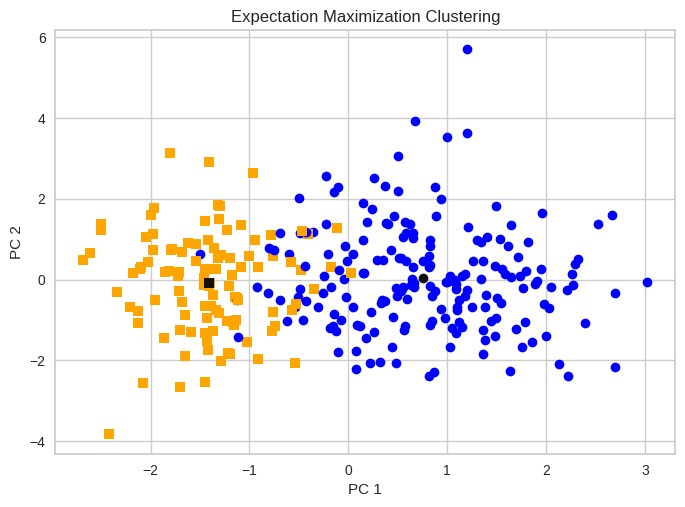

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm_labels = gm.predict(X)

cluster_centers = pca_2D.transform(gm.means_)

for i in range(len(Y)):
  if gm_labels[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif gm_labels[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')

plt.plot(cluster_centers[0][0], cluster_centers[0][1], 'o', color = 'k')
plt.plot(cluster_centers[1][0], cluster_centers[1][1], 's', color = 'k')


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Expectation Maximization Clustering')
plt.show()

The k=2 clustering provides a similar result as the other algorithms.

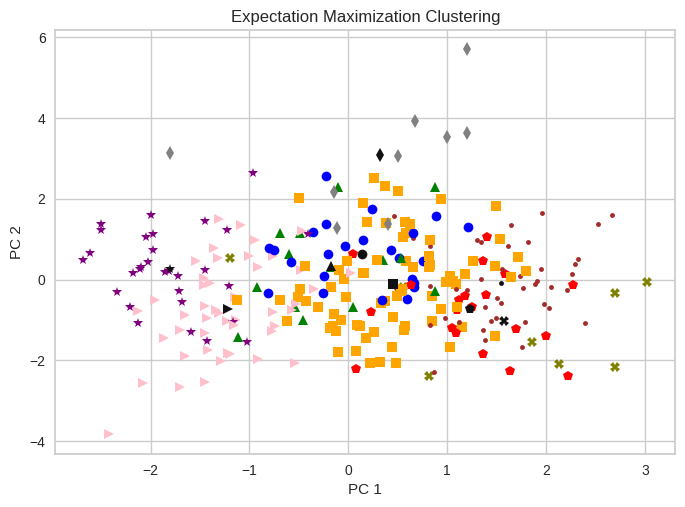

In [ ]:
gm = GaussianMixture(n_components=10, random_state=0).fit(X)
gm_labels = gm.predict(X)

cluster_centers = pca_2D.transform(gm.means_)

for i in range(len(Y)):
  if gm_labels[i] == 0:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'o', color = 'blue')
  elif gm_labels[i] == 1:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 's', color = 'orange')
  elif gm_labels[i] == 2:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '^', color = 'green')
  elif gm_labels[i] == 3:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'p', color = 'red')
  elif gm_labels[i] == 4:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '*', color = 'purple')
  elif gm_labels[i] == 5:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '.', color = 'brown')
  elif gm_labels[i] == 6:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '>', color = 'pink')
  elif gm_labels[i] == 7:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'd', color = 'gray')
  elif gm_labels[i] == 8:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], 'X', color = 'olive')
  elif gm_labels[i] == 9:
    plt.plot(X_pca_2D[i][0], X_pca_2D[i][1], '|', color = 'cyan')

plt.plot(cluster_centers[0][0], cluster_centers[0][1], 'o', color = 'k')
plt.plot(cluster_centers[1][0], cluster_centers[1][1], 's', color = 'k')
plt.plot(cluster_centers[2][0], cluster_centers[2][1], '^', color = 'k')
plt.plot(cluster_centers[3][0], cluster_centers[3][1], 'p', color = 'k')
plt.plot(cluster_centers[4][0], cluster_centers[4][1], '*', color = 'k')
plt.plot(cluster_centers[5][0], cluster_centers[5][1], '.', color = 'k')
plt.plot(cluster_centers[6][0], cluster_centers[6][1], '>', color = 'k')
plt.plot(cluster_centers[7][0], cluster_centers[7][1], 'd', color = 'k')
plt.plot(cluster_centers[8][0], cluster_centers[8][1], 'X', color = 'k')
plt.plot(cluster_centers[9][0], cluster_centers[9][1], '|', color = 'k')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Expectation Maximization Clustering')
plt.show()

The k=10 clustering provides a similar result to the k means clustering algorithm.

### Compare and contrast the clustering results from K-Means, Kernel K-Means, and EM.



The clustering results obtained from k-means, kernel k-means, and EM are very similar for the k=2 case. Neither algorithm was able to identify clusters that aligned with those indicated by the class labels of the dataset. This makes sense; looking at the 2D and 3D PCA graphs of the original dataset does not yield clear clusters that separate the “death event” data points from the rest of the dataset. The two classes are clearly separable to some degree, however, there are no clear clusters that yield to natural separation. The K=10 clusters from k-means and EM are very similar while the kernel k-means is different. This is because the kernel k means clustering introduces a degree of non-linearity through the rbf kernel, which yields clusters that are more radial in nature.

### Analyze the clinical significance of patient clusters in predicting 'DEATH_EVENT.'

The patient clusters are significant; however, they do not directly relate to predicting the death event label. Rather, they seem to indicate separate subpopulations of patients that experienced heart failure for different reasons. For instance, according to the NIH, smoking, lack of physical activity, and diabetes are all risk factors for heart failure. One cluster may represent the subset of the patient population that experienced heart failure mainly due to diabetes related factors while another cluster may represent the subset of the patient population that experienced heart failure due to smoking related factors. Another cluster could be age related and so on. However, the clusters do not seem to directly separate the data into patients who died and those who did not.

---

##Regression Analysis



---

###Split the dataset into training and testing sets.

---

The code below splits the original dataset into training and testing data with 33% of the data being reserved for testing. The training data is then standardized, and the testing data is standardized according to the mean and variance of the training dataset.

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original, Y, test_size=0.33, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(len(X_train))
print(len(X_test))

200
99


200 datapoints are reserved for training and 99 are reserved for testing.

###Perform Linear Regression using relevant clinical features to predict 'DEATH_EVENT.'

---

The code below fits a linear regression model to the training data.

---

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

---

The code below predicts the test data based on the trained regression model and then calculates the MSE. The test labels and predictions are also printed below.

---

In [ ]:
y_pred = reg.predict(X_test)
linear_error = mean_squared_error(y_test, y_pred)
print(linear_error)

0.17491364110282992


In [ ]:
print(y_test)

[0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1]


In [ ]:
print(y_pred)

[ 0.22089078 -0.16036631  0.20054772  1.65197741  0.24870727 -0.03637451
  0.49095666  0.23434237  0.80811542  0.18284924  0.2530501   0.09974462
  0.22524204  0.30390667  0.32415508  0.4010195   0.08191432  0.40768491
  0.25437723  0.39701671  0.37261586  0.41128501  0.30770053  0.52255363
  0.50385327 -0.12824287 -0.04020281  0.11785042  0.21625851 -0.10422268
  0.68592706 -0.07902163  0.55446411  0.84952361  0.56629129  0.34756999
  0.24500945  0.23881155  0.39191831  0.1673517   0.45534811  0.74227751
  0.15128642  0.29039773  0.45526559  0.23230154  0.31812495  0.03109667
  0.05948832 -0.09154536  0.46720359  0.03167879  0.45835033 -0.08616245
 -0.0060082   0.38109167  0.08618708  0.71736458  0.14839837  0.68877158
  0.78033222  0.390021    0.17744382  0.29697906  0.76281315  0.49141365
 -0.33013769  0.6748712   0.19066957 -0.16507135  0.70863726  0.79146999
 -0.02247467 -0.05003139  0.26377626  0.14790229  0.4000556   0.58863641
 -0.42186881 -0.01655635  0.27455391  0.59276216  0

---

Finally, the code below scales the predictions to [0,1] and rounds to create the predicted classes and calculates the accuracy.

---

In [ ]:
scaler = MinMaxScaler()

y_class = (np.round(scaler.fit_transform(y_pred.reshape(-1, 1)))).flatten()

print(y_class)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0.]


In [ ]:
accuracy_score(y_test, y_class)

0.6868686868686869

---

The code below visualizes the result of the linear regression by visualizing the test dataset using a 1D PCA with the label as the y value. The predictions generated by the regression model on the test dataset are then plotted (after scaling the values to [0,1]) as a function of test datapoints projection on the first principal component. It provides a rough visualization as to how the regression model attempt to capture the pattern expressed in the data.

---

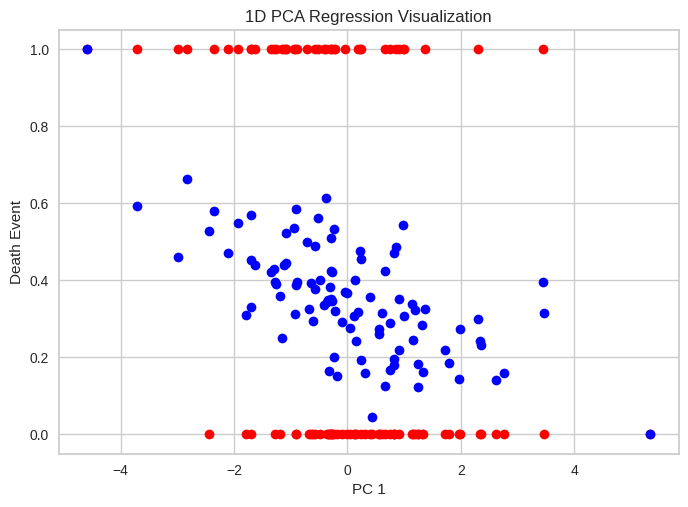

In [ ]:
pca_1D = PCA(n_components=1)
X_pca_1D = pca_1D.fit_transform(X_test)

plt.plot(X_pca_1D, y_test, 'o', color = 'red')
plt.plot(X_pca_1D, (scaler.fit_transform(y_pred.reshape(-1, 1))).flatten(), 'o', color = 'blue')

plt.xlabel('PC 1')
plt.ylabel('Death Event')
plt.title('1D PCA Regression Visualization')
plt.show()

It can be seen that the regression model gives a continuous output that is not very well suited to the classification problem. The test data that represents a mortality has PC1 with slightly smaller values than the test data that represent patients that lived. However, many datapoints overlap, making liner regression suboptimal with a value threshold of 0.5.

###Implement Ridge Regression with the same features.

---

The code below fits a ridge regression model to the training data.

---

In [ ]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)

---

The code below predicts the test data based on the trained regression model and then calculates the MSE. The test labels and predictions are also printed below.

---

In [ ]:
y_pred = ridge.predict(X_test)
ridge_error = mean_squared_error(y_test, y_pred)
print(ridge_error)

0.1748296899446683


In [ ]:
print(y_test)

[0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1]


In [ ]:
print(y_pred)

[ 0.22084311 -0.15878291  0.20088706  1.64656507  0.24833883 -0.03511407
  0.49026363  0.23384183  0.80634397  0.18315505  0.25311558  0.10059768
  0.22512748  0.30395288  0.32355641  0.40147903  0.08310525  0.40691502
  0.25379151  0.39693515  0.37216349  0.4100993   0.30775051  0.52214763
  0.50253804 -0.12652897 -0.038215    0.11879986  0.21698063 -0.10261239
  0.68427822 -0.07759573  0.55263114  0.84699631  0.5644574   0.34756671
  0.24513521  0.2392107   0.39080748  0.16719119  0.45390657  0.74008974
  0.15182771  0.28955062  0.45415025  0.23189055  0.31794011  0.0315466
  0.06015777 -0.08994955  0.46652554  0.03236152  0.4572418  -0.08549864
 -0.00483599  0.3800499   0.08733365  0.71437704  0.14925374  0.68674929
  0.77816156  0.39025455  0.178352    0.29617647  0.76150773  0.49031629
 -0.32670095  0.67276681  0.19146536 -0.16250471  0.70706962  0.78917365
 -0.02137215 -0.0487779   0.26475232  0.14916664  0.40012573  0.58659832
 -0.41865292 -0.0145322   0.27428023  0.59195268  0.

---

Finally, the code below scales and rounds the predictions to create predicted classes and calculates the accuracy.

---

In [ ]:
scaler = MinMaxScaler()

y_class = (np.round(scaler.fit_transform(y_pred.reshape(-1, 1)))).flatten()

print(y_class)

[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0.]


In [ ]:
accuracy_score(y_test, y_class)

0.6868686868686869

---


A similar visualization is created for ridge regression as for linear regression. The plots look very similar.


---

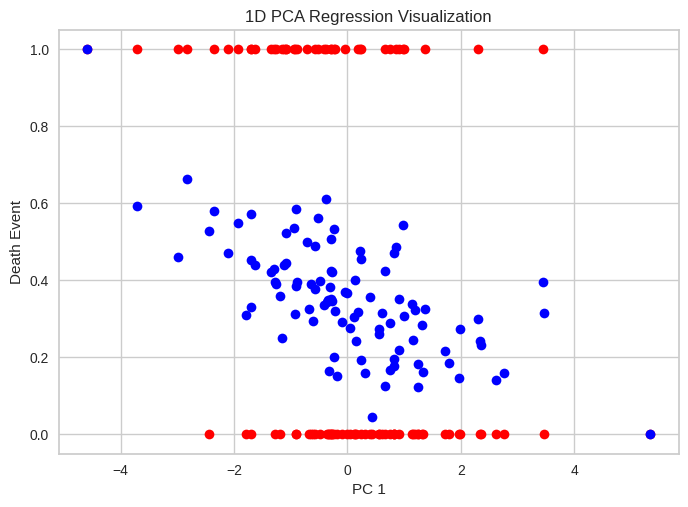

In [ ]:
pca_1D = PCA(n_components=1)
X_pca_1D = pca_1D.fit_transform(X_test)

plt.plot(X_pca_1D, y_test, 'o', color = 'red')
plt.plot(X_pca_1D, (scaler.fit_transform(y_pred.reshape(-1, 1))).flatten(), 'o', color = 'blue')

plt.xlabel('PC 1')
plt.ylabel('Death Event')
plt.title('1D PCA Regression Visualization')
plt.show()

Overall, the accuracy achieved was very similar to the linear regression model.

###Evaluate the performance of both models using appropriate regression metrics (e.g., Mean Squared Error).

Both linear regression and ridge regression achieved the same accuracy score for predicting mortality, however, ridge regression had a MSE that was 0.0001 lower than linear regression. This suggests a similar degree of performance with ridge regression having a slight edge over linear regression.

###Discuss the strengths and weaknesses of the Linear and Ridge Regression models for mortality prediction.

Regression is typically used to fit a function to capture the relationship between the input features and the output in a continuous way. This means that regression is used to estimate real-valued continuous outputs rather than discrete binary outputs. The problem of predicting mortality based on 12 clinical input features is a classification problem rather than a regression problem. However, regression can give a rough classification by rounding the output and comparing it to zero or one. Regression is poorly suited for this problem because it will output a continuous spectrum from around 0 to around 1 to fit the data with binary labels. This can be seen with a ~70% accuracy, which is poor considering that  68% of patients in the dataset lived (which means a naive classifier could at least score near 68% given evenly split training and test data). However, regression models can be fitted fast and are easy to interpret.

---

##Classification Analysis



---



###Define a binary classification task to predict 'DEATH_EVENT.'

The problem of predicting the “DEATH_EVENT” features is a binary classification task. The data points with 1s for death event represent a mortality while 0s do not. We can use various classifiers with the death event feature as the data label to predict the death event. The training data and test data split from the regression analysis can be used.

###Apply Bayesian Classifier and Naive Bayes to predict 'DEATH_EVENT.'

---


The code below implements the Bayesian classifier from scratch. It defines a BayesClassifier class that trains the model upon initialization and can be used to predict on new data points by using the predict method.  


---

In [ ]:
class BayesClassifier:
    def __init__(self, X, y):
        self.priors = []
        self.means = []
        self.covs = []

        for i in range(2):
            Di = []
            for j, label in enumerate(y):
                if label == i:
                    Di.append(X[j])

            Di = np.array(Di)
            self.priors.append(len(Di) / len(y))
            self.means.append(np.mean(Di, axis=0))
            self.covs.append(np.cov(Di, rowvar=False))

    def predict(self, X):
        predictions = []
        for point in X:
            f_classes = []
            for i in range(2):
                gaussian = (1 / ((2 * np.pi) ** 12 * np.sqrt(np.abs(np.linalg.det(self.covs[i]))))) * np.exp(-0.5 * np.dot(np.dot((point - self.means[i]).T, np.linalg.inv(self.covs[i])), (point - self.means[i])))
                f_classes.append(gaussian)
            predictions.append(np.argmax(f_classes))
        return predictions


---

The bayes classifier is trained below and the accuracy is calculated from the predictions on the test set. The confusion matrix is also shown for the classification algorithm below.

---

In [ ]:
bayes = BayesClassifier(X_train, y_train)
y_pred = bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7373737373737373


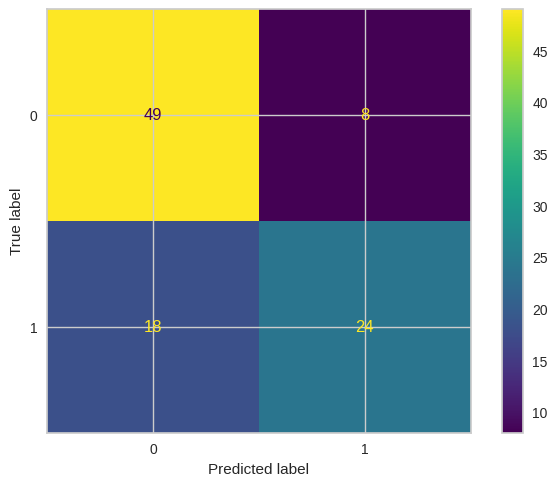

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---

The naïve bayes classifier from Sklearn is trained below and the accuracy is calculated from the predictions on the test set. The confusion matrix is also shown for the classification algorithm below.

---

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);

In [ ]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.696969696969697


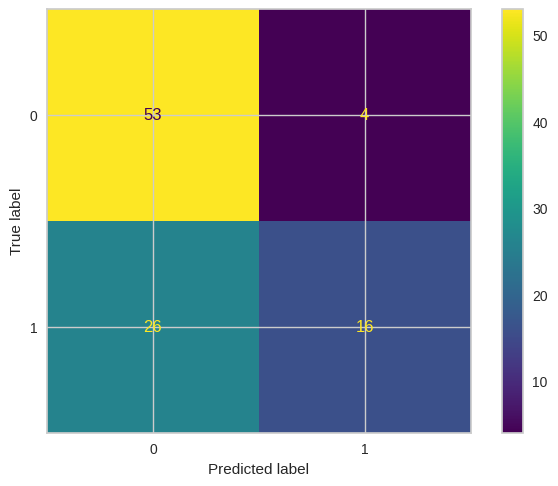

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###Implement k-Nearest Neighbors (KNN) classification with the same target variable.

---

The KNN (k=3) classifier is trained below and the accuracy is calculated from the predictions on the test set. The confusion matrix is also shown for the classification algorithm below.

---

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train);

In [ ]:
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.696969696969697


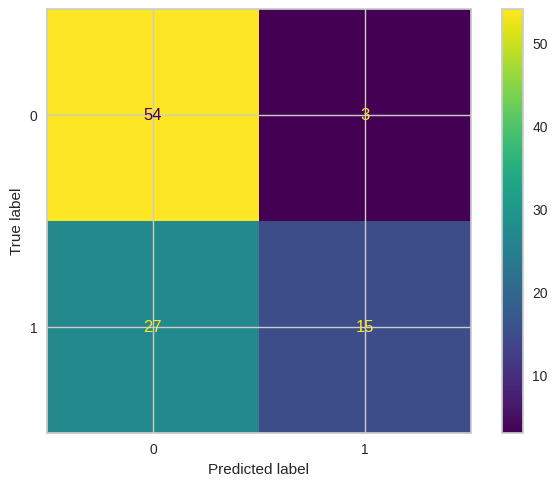

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

###Evaluate the performance of each classification model using metrics such as accuracy.

The accuracy of the KNN and naïve bayes classifiers was around 70%, while the accuracy of the bayes classifier was around 73%.  These metrics are similar, but the bayes classifiers performed slightly better than the other two. The confusion matrices showed that the KNN and naïve bayes classifiers often mislabeled death events as non-death events while the bayes classifier more often mislabeled non-death events as death events.

###Discuss the suitability of each classification method for identifying patients at risk.

The KNN, naïve bayes, and bayes classifiers are all well suited for identifying patients at risk for mortality from heart failure. They were all more accurate than the naïve baseline, providing useful insights. However, the bayes classifier had more false positives compared to the other two, which had more false negatives. This is more suitable for the classification task, as it is better to alert doctors falsely than not to alert them when a patient is at high risk. Additionally, it is interesting to note that the accuracies achieved are similar to those achieved in the dataset’s original paper, which implies that the classifiers are suitable to the task at hand. The fact that bayes classifier performed the best suggests that not all input features are conditionally independent, making the bayes classifier potentially better suited to the task than naïve bayes.

---

## Naive Classifier and PCA-Based KNN

---

### Naive

---

The code below shows the accuracy for a naïve classifier that always predicts the label that the majority of datapoint have (patient lives).

---

In [ ]:
accuracy = accuracy_score(Y, np.zeros(299))
print(accuracy)

0.6789297658862876


### PCA-Based KNN

---

The code below reduces the data to three dimensions and fits a KNN classifier to it (k=3). The test dataset is then used to calculate the accuracy of the classifier and the confusion matrix is printed. This was done based on the data set’s paper’s findings that only two of the features are enough to create classifications.

---

In [ ]:
pca_3D = PCA(n_components=3)
X_pca_3D = pca_3D.fit_transform(X_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_pca_3D, y_train)

y_pred = neigh.predict(pca_3D.transform(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7070707070707071


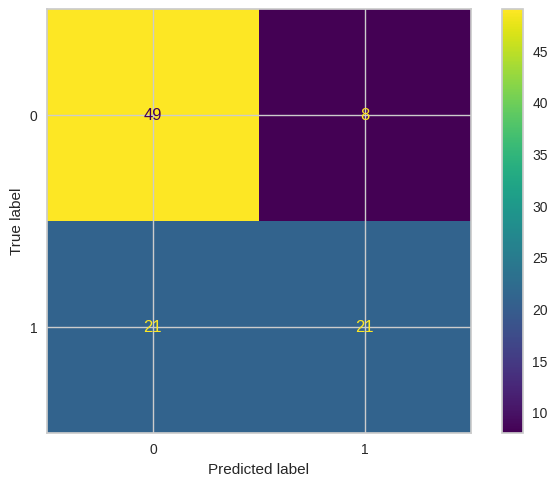

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---

##Discussion and Conclusions

---

### Findings and insights

This project highlighted the applications of clustering, regression, and classification to a medical dataset. Clustering revealed that the dataset itself does not naturally lend to clusters that discriminate patients that died vs those that lived. However, the clusters may signify important patient subpopulations that can provide insights into different reasons that heart failure may occur. Regression, although not best suited to the task of classification, revealed a significant degree of overlap between the two classes. This means that a high degree of accuracy is difficult to achieve as a generalized decision boundary would not be able to entirely separate both classes.  Finally, classification analysis showed that classifiers can be created using the features to predict patients that are at high risk for mortality from heart failure. The classifiers were able to achieve an accuracy of around 73% at best, which is a 5% improvement from a naïve classification strategy.

### Clinical Relevance

This data exploration is clinically relevant because it shows that patients who experience mortality from heart failure have identifiable clinical feature characteristics that are generally not present in patients who do not experience mortality. However, this is not a strict boundary but rather a more fluid one, which makes the classification problem explored in this notebook difficult. As the 3D PCA shows, a general decision boundary is present between the two classes,  but this boundary is far from perfect. This implies that physicians may be able to identify high risk patients (ones that clearly fall on the morality side of the boundary) using data science techniques. However, such methods are far from perfect and can augment physician risk assessment, but not replace it.  

### Contribution to Mortality Prediction in Cardiovascular Medicine

Overall, the project showed that mortality prediction in cardiovascular medicine is possible, but it is not perfect. Patients who do not exhibit clinical features with values that are typically associated with mortality (as identified by machine learning methods) may still die and vice versa. However, the results highlighted that mortality prediction systems can be created as a useful tool to augment physicians in identifying and caring for high risk patients (those clearly beyond the general decision boundary identified by the regression and classification methods utilized). Furthermore, physicians could use similar techniques to monitor patients as their biological signs move from a low-risk area to one that is closer to the decision boundary, and thus represents an increase in risk that is worth monitoring.

---

## References

- "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

Original Dataset Paper

- https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

Elbow Method for K-Means Clustering

- https://gist.github.com/mblondel/6230787

Kernel K-Means Clustering Algorithm

- https://www.nhlbi.nih.gov/health/heart-failure/causes

Clinical Information on Heart Failure